# Predicting Absenteeism Time in Hours 

Personal exam of the Machine Learning module in Purwadhika Data Science courses. In this task, the dataset from Purwadhika will be explored to solve an existing problem based on the dataset that we choose and develope a Machine Learning Modul that can predict the abenteeism time of employee. After that, the recommendation for solving the problem will be given.

Dataset: Absenteeism

There will be several steps that we will do:
1. Read Data & Check Data
2. Define Goals
3. Base Modeling
4. Quick EDA and Feature Selection 
5. Machine Learning Modeling (include: Feature Engineering)
6. Conclusion & Answer Goal
7. Recommendation

So without further ado, let's get started!

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, PowerTransformer

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

import scipy.stats as ss
from collections import Counter

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error,median_absolute_error

In [2]:
pd.set_option('display.max_columns', 500)

## 1. Read Data & Check Data

In [3]:
df_absen = pd.read_csv('Absenteeism.csv', sep = ';',)
df_absen

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [4]:
df = df_absen.copy()
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


### 1.1 Check detail data

In [5]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,ID,int64,0,0.0,36,"[7, 10]"
1,Reason for absence,int64,0,0.0,28,"[2, 25]"
2,Month of absence,int64,0,0.0,13,"[11, 9]"
3,Day of the week,int64,0,0.0,5,"[5, 6]"
4,Seasons,int64,0,0.0,4,"[1, 3]"
5,Transportation expense,int64,0,0.0,24,"[179, 330]"
6,Distance from Residence to Work,int64,0,0.0,25,"[15, 35]"
7,Service time,int64,0,0.0,18,"[17, 10]"
8,Age,int64,0,0.0,22,"[53, 32]"
9,Work load Average/day,float64,0,0.0,38,"[265.017, 241.476]"


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [7]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [8]:
df['Hit target'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91],
      dtype=int64)

In [9]:
df['Service time'].unique()

array([13, 18, 14,  3, 11, 16,  4,  6, 12,  7, 10,  9, 17, 29,  8,  1, 15,
       24], dtype=int64)

**Explanation of Reason for Absence:**

Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).


**Explanation of Hit target:**

Based on https://www.bethebusiness.com/productivity-insights/linking-staff-incentives-with-frequent-reporting-and-target-hitting/#:~:text=Hitting%20targets%20means%20giving%20them,that%20will%20make%20a%20difference. Hit Target means " giving them the attention they need to promote positive behaviour across job roles, to boost communication and create camaraderie. ". So in the dataset that we have, it's manifestated as an integer data or like a score (KPI)

**Explanation of Service Time**

Based on https://encyclopedia2.thefreedictionary.com/Length+of+Service , Service Time is like the time spent by a worker at his job or performing some other activity beneficial to society.

#### *Exploration Result*
So we've import all libraries and the dataset.
The data looks like clean because there are no nulls data.

## 2. Define Problems & Goals

**Problems**

    KPI menjadi tolak ukur utama untuk setiap pegawai yang bekerja di suatu perusahaan. Ada banyak parameter untuk menilai KPI seorang pegawai, salah satunya kehadiran tepat waktu. 
    Kehadiran tepat waktu sangat berpengaruh terhadap KPI karena jika ada pegawai yang terlambat tentu saja membuat suatu pekerjaan bisa jadi lambat atau bahkan terhenti prosesnya.
    Untuk itu, perusahaan ingin mengetahui kriteria atau kondisi seperti apa yang dialami oleh pegawai sehingga pegawai tersebut bisa terlambat berangkat kerja.
    Hal ini mejadi penting lantaran pekerjaan yang ada pada perusahaan ini sangat agile sehingga keterlabatan pegawai tentu menjadi isu.
    Isu pertama jelas jika pegawai terlambat maka pegawai tersebut melanggar peraturan sementara upah yang dibayarkan terhitung dari waktu masuk yang tepat. Lalu, jika pesentase pegawai sering terlambat sangat besar, tentu saja akan memengaruhi nilai KPI perusahaan dan membuat pekerjaan waktunya mundur sehingga membuat rugi perusahaan tersebut.

    KPI is the main benchmark for every employee who works in a company. There are many parameters to assess an employee's KPI, one of which is punctual attendance.
    Attendance on time is very influential on KPI because if there are employees who are late, of course, making a job can be slow or even stop the process.
    For this reason, companies want to know what criteria or conditions are experienced by employees so that they can be late for work.
    This is important because the work at this company is very agile, so employee engagement is certainly an issue.
    The first issue is clear that if the employee is late then the employee is breaking the rules while the wages paid are calculated from the correct time of entry. Then, if the percentage of employees who are often late is very large, of course it will affect the KPI value of the company and make the work time off, thus causing the company to lose.

**Goals**

From the previous exploration on Read&Check data, we can set the goals for the company:
1. **Spell out meaningful insights from our exploration**
2. **Make a Machine Learning Model that can Predict the absenteeism time to an new candidate employee**

## 3. Base Modeling

So, we need to do Base Modeling just in case to check the R2 score base on the data.

We do Base Modeling in the separate notebook.

**And the result of Base Modeling is pretty-pretty bad. The data is not good at all.**

But we're not giving up, lets continue to Feature Engineering, Scaling and Tuning.

## 4. Quick EDA and Feature Selection

### 4.1 Exploring Target

In [10]:
df['Absenteeism time in hours'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

Is it make any sense if someone late for more than 24 hours? Hmm maybe we should drop the data that hase an absen time more than 24 hours.

In [11]:
print('Data before drop:', df.shape[0])
df = df[df['Absenteeism time in hours'] <= 24]
print('Data after drop:', df.shape[0])

Data before drop: 740
Data after drop: 712


#### Check the outliers of target

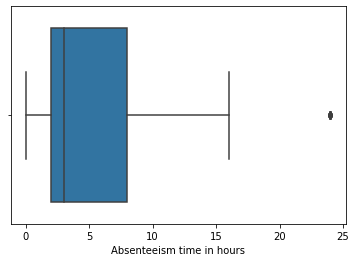

In [12]:
sns.boxplot(df['Absenteeism time in hours'])
plt.show()

#### Check distribution data of target

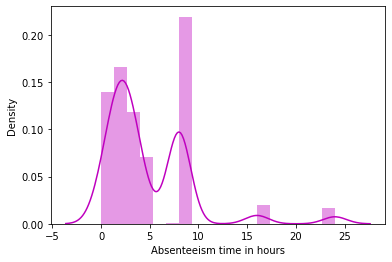

In [13]:
sns.distplot(df["Absenteeism time in hours"], kde=True, color='m')
plt.show()

The target data is not distributed normally.

There's one data suspected as an outlier, but that's okay, we keep count someone who absen for 24 hours.

#### Count what most caused absence

In [14]:
df_reason_absence = df[['Reason for absence', 'Absenteeism time in hours']].groupby(['Reason for absence']).count()
df_reason_absence

,Absenteeism time in hours
Reason for absence,
0,43
1,15
2,1
3,1
4,2
5,3
6,7
7,14
8,6


Seems like the most reason for absence is because of medical consultation (149) and only 6% (43/712) data who not absence. After this we need to recategorize the reason for absence.

In [16]:
df_wl = (df[['Work load Average/day ', 'Absenteeism time in hours']].groupby(['Absenteeism time in hours']).mean()*100)
df_wl

,Work load Average/day
Absenteeism time in hours,
0,27662.350000
1,27935.570455
2,26681.666879
3,26450.241071
4,26134.666667
5,27627.871429
7,20591.700000
8,27263.714904
16,29079.947368


Seems like the average of Work load for each absenteeism time is quite similar.

### 4.2 Feature Selection

We choose some features to be our features

In [17]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [18]:
df = df[['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work',
        'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son', 'Pet', 'Body mass index', 'Absenteeism time in hours']]

df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,2,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,2,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,2,1,30,2


### 4.3 Data Conversion

There some features that we have to convert or Encode. They are:
1. Reason for absence (Recategorize)
2. Seasons (One Hot Encode) 

#### 1. Reason for absence (Recategorize)

As we can see, the absence code from 1 - 21 is representing od illness (except pregnancy) and from 22-28 is representing of medical checkup. So, we will devide em into 3 categories where:
1. 0 = Not Absence
2. 1 = Absence caused by illness
3. 2 = Absence caused by medical checkup

In [19]:
df['Reason for absence'] = df['Reason for absence'].apply(lambda x: 0 if x == 0 else (1 if x >= 1 and x <=21 else 2))

In [20]:
df['Reason for absence'].value_counts()

2    435
1    234
0     43
Name: Reason for absence, dtype: int64

#### 2. One Hot Encode

In [21]:
df = pd.get_dummies(data = df, columns=['Reason for absence'],prefix_sep='_')
df = pd.get_dummies(data = df, columns=['Seasons'],prefix_sep='_')

In [22]:
df.head()

,Month of absence,Day of the week,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Son,Pet,Body mass index,Absenteeism time in hours,Reason for absence_0,Reason for absence_1,Reason for absence_2,Seasons_1,Seasons_2,Seasons_3,Seasons_4
0,7,3,289,36,13,33,239.554,97,0,2,1,30,4,0,0,1,1,0,0,0
1,7,3,118,13,18,50,239.554,97,1,1,0,31,0,1,0,0,1,0,0,0
2,7,4,179,51,18,38,239.554,97,0,0,0,31,2,0,0,1,1,0,0,0
3,7,5,279,5,14,39,239.554,97,0,2,0,24,4,0,1,0,1,0,0,0
4,7,5,289,36,13,33,239.554,97,0,2,1,30,2,0,0,1,1,0,0,0


Okay, from here we already have our clean dataset. So let's export it as a new CSV and do base modeling again. After we see a new result of our clean dataset, we'll do feature engineering etc.

In [23]:
df.to_csv('absence_clean.csv')

## 5. Machine Learning Modeling

### 5.1 Import Some Useful Function

In [24]:
def evaluation_matrix(Model, X_train, X_test, y_train, y_test, name):
    y_pred_train = Model.predict(X_train)
    y_pred_test = Model.predict(X_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    
    data = {
        f"Training {name}": [r2_train, mae_train, mse_train, rmse_train],
        f"Testing {name}": [r2_test, mae_test, mse_test, rmse_test]
    }
    
    df_eva = pd.DataFrame(data, index=['R2', 'MAE', 'MSE', 'RMSE'])
    return df_eva

In [25]:
df.columns

Index(['Month of absence', 'Day of the week', 'Transportation expense',
       'Distance from Residence to Work', 'Service time', 'Age',
       'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Son',
       'Pet', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_0', 'Reason for absence_1', 'Reason for absence_2',
       'Seasons_1', 'Seasons_2', 'Seasons_3', 'Seasons_4'],
      dtype='object')

### 5.3 Try Scale with Polynomial

In [26]:
X = df.drop(columns = 'Absenteeism time in hours')
y = df['Absenteeism time in hours']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 14)

In [28]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [29]:
scaler = RobustScaler()

In [30]:
num_col = df[['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
             'Hit target', 'Son', 'Pet', 'Body mass index']]

In [31]:
num_sc = scaler.fit_transform(num_col)

In [32]:
num_pol = poly.fit_transform(num_sc)

In [33]:
data_sp = pd.DataFrame(num_pol)

In [34]:
df_1 = pd.concat([df.drop(columns=['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
             'Hit target', 'Son', 'Pet', 'Body mass index']), data_sp], axis=1)

In [35]:
df_1.head()

,Month of absence,Day of the week,Disciplinary failure,Absenteeism time in hours,Reason for absence_0,Reason for absence_1,Reason for absence_2,Seasons_1,Seasons_2,Seasons_3,Seasons_4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218
0,7.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.790123,0.294118,0.000000,-0.444444,-0.610265,0.5,0.5,1.0,0.714286,0.624295,0.232389,0.000000,-0.351166,-0.482185,0.395062,0.395062,0.790123,0.564374,0.086505,0.000000,-0.130719,-0.179490,0.147059,0.147059,0.294118,0.210084,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.197531,0.271229,-0.222222,-0.222222,-0.444444,-0.317460,0.372424,-0.305133,-0.305133,-0.610265,-0.435904,0.25,0.25,0.5,0.357143,0.25,0.5,0.357143,1.0,0.714286,0.510204,0.493270,0.183616,0.000000,-0.277464,-0.380986,0.312148,0.312148,0.624295,0.445925,0.068350,0.000000,-0.103284,-0.141819,0.116195,0.116195,0.232389,0.165992,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.156074,0.214304,-0.175583,-0.175583,-0.351166,-0.250833,0.294261,-0.241093,-0.241093,-0.482185,-0.344418,0.197531,0.197531,0.395062,0.282187,0.197531,0.395062,0.282187,0.790123,0.564374,0.403124,0.025443,0.000000,-0.038447,-0.052791,0.043253,0.043253,0.086505,0.061789,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.058097,0.079773,-0.065359,-0.065359,-0.130719,-0.093371,0.109536,-0.089745,-0.089745,-0.17949,-0.128207,0.073529,0.073529,0.147059,0.105042,0.073529,0.147059,0.105042,0.294118,0.210084,0.150060,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.0,-0.000000,0.000000,-0.000000,-0.000000,-0.0,-0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,-0.087791,-0.120546,0.098765,0.098765,0.197531,0.141093,-0.165522,0.135615,0.135615,0.271229,0.193735,-0.111111,-0.111111,-0.222222,-0.158730,-0.111111,-0.222222,-0.158730,-0.444444,-0.31746,-0.226757,-0.227277,0.186212,0.186212,0.372424,0.266017,-0.152566,-0.152566,-0.305133,-0.217952,-0.152566,-0.305133,-0.217952,-0.610265,-0.435904,-0.311360,0.125,0.125,0.25,0.178571,0.125,0.25,0.178571,0.5,0.357143,0.255102,0.125,0.25,0.178571,0.5,0.357143,0.255102,1.0,0.714286,0.510204,0.364431
1,7.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.320988,-0.382353,0.714286,1.444444,-0.610265,0.5,0.0,0.0,0.857143,1.745008,0.505084,-0.943563,-1.908093,0.806153,-0.660494,-0.000000,-0.000000,-1.132275,0.146194,-0.273109,-0.552288,0.233337,-0.191176,-0.000000,-0.000000,-0.327731,0.510204,1.031746,-0.435904,0.357143,0.000000,0.0,0.612245,2.086420,-0.881494,0.722222,0.000000,0.000000,1.238095,0.372424,-0.305133,-0.000000,-0.000000,-0.523085,0.25,0.00,0.0,0.428571,0.00,0.0,0.000000,0.0,0.000000,0.734694,-2.305135,-0.667209,1.246435,2.520568,-1.064918,0.872504,0.000000,0.000000,1.495721,-0.193120,0.360774,0.729565,-0.308235,0.252542,0.000000,0.000000,0.432929,-0.673973,-1.362924,0.575824,-0.471781,-0.000000,-0.0,-0.808768,-2.756135,1.164443,-0.954047,-0.000000,-0.000000,-1.635509,-0.491967,0.403077,0.000000,0.000000,0.690988,-0.330247,-0.000000,-0.000000,-0.566138,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.970522,-0.055898,0.104424,0.211169,-0.089217,0.073097,0.000000,0.000000,0.125309,-0.195078,-0.394491,0.166669,-0.136555,-0.000000,-0.0,-0.234094,-0.797749,0.337042,

In [36]:
df_1.isna().sum()

Month of absence             26
Day of the week              26
Disciplinary failure         26
Absenteeism time in hours    26
Reason for absence_0         26
                             ..
214                          26
215                          26
216                          26
217                          26
218                          26
Length: 230, dtype: int64

In [37]:
df_1.dropna(inplace=True)
df_1.isna().sum()

Month of absence             0
Day of the week              0
Disciplinary failure         0
Absenteeism time in hours    0
Reason for absence_0         0
                            ..
214                          0
215                          0
216                          0
217                          0
218                          0
Length: 230, dtype: int64

In [38]:
X1 = df_1.drop(columns='Absenteeism time in hours')
y1 = df_1['Absenteeism time in hours']

In [39]:
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(X1, y1, test_size= .20, random_state=14)

In [40]:
LR_Robust_Poly = LinearRegression(fit_intercept=False).fit(X_train_sp, y_train_sp)
eva_lr_rp = evaluation_matrix(LR_Robust_Poly, X_train_sp, X_test_sp, y_train_sp, y_test_sp, "rp lr")
eva_lr_rp

,Training rp lr,Testing rp lr
R2,0.487819,-9.569811
MAE,2.225415,5.130422
MSE,10.926744,172.416575
RMSE,3.305563,13.130749


In [41]:
RD_Robust_Poly = Ridge(fit_intercept=False).fit(X_train_sp, y_train_sp)
eva_rd_rp = evaluation_matrix(RD_Robust_Poly, X_train_sp, X_test_sp, y_train_sp, y_test_sp, "rp rd")
eva_rd_rp

,Training rp rd,Testing rp rd
R2,0.470078,-0.231017
MAE,2.276394,3.311220
MSE,11.305235,20.080556
RMSE,3.362326,4.481133


In [42]:
LS_Robust_Poly = Lasso(fit_intercept=False).fit(X_train_sp, y_train_sp)
eva_ls_rp = evaluation_matrix(LS_Robust_Poly, X_train_sp, X_test_sp, y_train_sp, y_test_sp, "rp ls")
eva_ls_rp

,Training rp ls,Testing rp ls
R2,0.012121,-0.002703
MAE,3.195171,2.826768
MSE,21.075171,16.356263
RMSE,4.590770,4.044288


Ugh, the result is really-really bad.

### 5.4 Try PowerTransform with Poly

In [43]:
yeo_pow = PowerTransformer(method='yeo-johnson')

In [44]:
num_poly2 = poly.fit_transform(num_col)

In [45]:
num_pow = yeo_pow.fit_transform(num_poly2)

In [46]:
data_pow = pd.DataFrame(num_pow)

In [47]:
df2 = pd.concat([df.drop(columns=['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ',
             'Hit target', 'Son', 'Pet', 'Body mass index']), data_pow], axis=1)

In [48]:
df2.isna().sum()

Month of absence             26
Day of the week              26
Disciplinary failure         26
Absenteeism time in hours    26
Reason for absence_0         26
                             ..
214                          26
215                          26
216                          26
217                          26
218                          26
Length: 230, dtype: int64

In [49]:
df2.dropna(inplace=True)
df2.isna().sum()

Month of absence             0
Day of the week              0
Disciplinary failure         0
Absenteeism time in hours    0
Reason for absence_0         0
                            ..
214                          0
215                          0
216                          0
217                          0
218                          0
Length: 230, dtype: int64

In [50]:
X2 = df2.drop(columns='Absenteeism time in hours')
y2 = df2['Absenteeism time in hours']

In [51]:
X_train_sp2, X_test_sp2, y_train_sp2, y_test_sp2 = train_test_split(X2, y2, test_size= .20, random_state=14)

In [52]:
LR_Power_Poly = LinearRegression(fit_intercept=False).fit(X_train_sp2, y_train_sp2)
eva_lr_rp2 = evaluation_matrix(LR_Power_Poly, X_train_sp2, X_test_sp2, y_train_sp2, y_test_sp2, "rp lr")
eva_lr_rp2

,Training rp lr,Testing rp lr
R2,0.477415,-2.431577
MAE,2.288293,4.146354
MSE,11.148698,55.976469
RMSE,3.338967,7.481742


In [54]:
RD_Power_Poly = Ridge().fit(X_train_sp2, y_train_sp2)
eva_rd_rp2 = evaluation_matrix(RD_Power_Poly, X_train_sp2, X_test_sp2, y_train_sp2, y_test_sp2, "rp lr")
eva_rd_rp2

,Training rp lr,Testing rp lr
R2,0.335646,0.070142
MAE,2.522081,2.630945
MSE,14.173170,15.167998
RMSE,3.764727,3.894611


In [55]:
LS_Power_Poly = Lasso().fit(X_train_sp2, y_train_sp2)
eva_ls_rp2 = evaluation_matrix(LS_Power_Poly, X_train_sp2, X_test_sp2, y_train_sp2, y_test_sp2, "rp ls")
eva_ls_rp2

,Training rp ls,Testing rp ls
R2,0.015489,0.003165
MAE,3.453015,3.155204
MSE,21.003319,16.260546
RMSE,4.582938,4.032437


### 5.5 Try Hyper Parameter Tuning

In [56]:
xgb = XGBRegressor()

In [57]:
param_xgb = {'max_depth': [None, 2, 4, 6, 8],
             'learning_rate': [0.01, 0.1, 1], 
             'n_estimators': [100, 500, 1000], 
             'gamma': [0.01, 0.1, 1]}

In [58]:
xgb_tuned = RandomizedSearchCV(xgb, param_xgb, cv = 3, n_jobs = -1 , n_iter=150, verbose = 1).fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


In [60]:
xgb_tuned = xgb_tuned.best_estimator_

In [61]:
eva_xgb = evaluation_matrix(xgb_tuned, X_train, X_test, y_train, y_test, "rp ls")
eva_xgb

,Training rp ls,Testing rp ls
R2,0.418010,0.228320
MAE,2.133937,2.735612
MSE,10.876166,19.837873
RMSE,3.297903,4.453973


In [62]:
rf = RandomForestRegressor()

In [65]:
param_rf = {"n_estimators": [100, 500, 750, 1000],
             "max_depth": [None, 2, 4, 6, 8, 10], 
             'min_samples_split': np.arange(2, 15),
            'min_samples_leaf': np.arange(1,15)}

In [66]:
rf_tuned = RandomizedSearchCV(rf, param_rf, cv = 3, n_jobs = -1 , n_iter=175, verbose = 1).fit(X_train, y_train)

Fitting 3 folds for each of 175 candidates, totalling 525 fits


In [69]:
eva_rf = evaluation_matrix(rf_tuned, X_train, X_test, y_train, y_test, "rp ls")
eva_rf

,Training rp ls,Testing rp ls
R2,0.583627,0.242521
MAE,1.698145,2.610525
MSE,7.781132,19.472787
RMSE,2.789468,4.412798


In [70]:
xgb_tuned2 = RandomizedSearchCV(xgb, param_xgb, cv = 3, n_jobs = -1 , n_iter=175, verbose = 1).fit(X_train_sp2, y_train_sp2)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


In [71]:
eva_xgb2 = evaluation_matrix(xgb_tuned2, X_train_sp2, X_test_sp2, y_train_sp2, y_test_sp2, "rp ls")
eva_xgb2

,Training rp ls,Testing rp ls
R2,0.440697,0.172261
MAE,2.449247,2.450735
MSE,11.932042,13.502225
RMSE,3.454279,3.674537


## 6. Conclusion & Answer Goal

So we almost come to our last steps

And the best model goes to : XGB Tuned.

In [72]:
eva_xgb

,Training rp ls,Testing rp ls
R2,0.418010,0.228320
MAE,2.133937,2.735612
MSE,10.876166,19.837873
RMSE,3.297903,4.453973


#### Explanation of Evaluation Matrics result from XGB Tuned model 

- So our R2 score for Train is 41% and Test is 23%. Yea it's overfitting but that's actually better than 1% or even -1% as the result that we got from base model.
- The value of r2(RSquared) is the value of our confidence in the prediction results of our model. So the greater the r2 value, the better. However, it must also be noted that we must keep the difference between the value of r2 train and r2 test small so that it does not fall into the Overfitting category. It could also be that if the results of the r2 train and r2 test are both bad then it is in the underfitting category.
- While MAE is the absolute value of our error, the closer to 0, the better. And we need to average it first based on the average target data.
- MSE and RMSE are the average error that getting closer to 0, the better.

## 7. Recommendation

The result from our Modeling is still not good. The model still overfitting. So the best thing that I might recommend is:
1. Scrap more data

But, if the company still gonna use our model, it might caused so many errors. So we need to get more data and do again the modeling.

#### Export the Model

In [73]:
import joblib
joblib.dump(xgb_tuned, 'Model1_XGB')

['Model1_XGB']